In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("volve_production_data.csv")

# EDA
- Data description
- Identifying inconsistent data
- Handling missing data
- Descriptive statistics
- Outliers treatment 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   1344 non-null   object 
 1   WELL_BORE_CODE            1344 non-null   object 
 2   NPD_WELL_BORE_CODE        1344 non-null   int64  
 3   NPD_WELL_BORE_NAME        1344 non-null   object 
 4   NPD_FIELD_CODE            1344 non-null   int64  
 5   NPD_FIELD_NAME            1344 non-null   object 
 6   NPD_FACILITY_CODE         1344 non-null   int64  
 7   NPD_FACILITY_NAME         1344 non-null   object 
 8   ON_STREAM_HRS             1344 non-null   float64
 9   AVG_DOWNHOLE_PRESSURE     1344 non-null   float64
 10  AVG_DOWNHOLE_TEMPERATURE  1344 non-null   float64
 11  AVG_DP_TUBING             1344 non-null   float64
 12  AVG_ANNULUS_PRESS         1344 non-null   float64
 13  AVG_CHOKE_SIZE_P          1344 non-null   float64
 14  AVG_CHOK

# Data Description
<div style="height190px">

| Abbreviation              | Description                                           |Units                  | Units (After Conversion)
|---------------------------|:-----------------------------------------------------:|:---------------------:|:-----------------------------:|
| DATEPRD                   | Date of Record                                        | days                  | days                          |                           
| WELL_BORE_CODE           | Well Bore Code                                        | N/A                   | N/A                           |     
| NPD_WELL_BORE_CODE       | Norwegian Petroleum Directorate Well Bore Code        | N/A                   | N/A                           |
| NPD_WELL_BORE_NAME       | Norwegian Petroleum Directorate Well Bore Nmae        | N/A                   | N/A                           | 
| NPD_FIELD_CODE           | Norwegian Petroleum Directorate Field Code            | N/A                   | N/A                           |
| NPD_FIELD_NAME           | Norwegian Petroleum Directorate Field Name            | N/A                   | N/A                           |    
| NPD_FACILITY_CODE        | Norwegian Petroleum Directorate Facility Code         | N/A                   | N/A                           |
| NPD_FACILITY_NAME        | Norwegian Petroleum Directorate Facility Name         | N/A                   | N/A                           |
| ON_STREAM_HRS             | On stream hours                                       | hours                 | hours                         |
| AVG_DOWNHOLE_PRESSURE     | Average Downhole Pressure                             | bar                   | psig                          |
| AVG_DOWNHOLE_TEMPERATURE  | Average Downhole Temperature                          | ◦C (degree Celsius)   | ◦F  (degree Fahrenheit)       |
| AVG_DP_TUBING Average     | Differential Pressure of Tubing                       | bar                   | psig                          |
| AVG_ANNULUS_PRESS         | Average Annular Pressure                              | bar                   | psig                          |
| AVG_CHOKE_SIZE_P          | Average Choke Size Percentage                         | %                     | %                             |
| AVG_CHOKE_UOM             | Average Choke (Unit of Measure)                       | N/A                   | N/A                           |
| AVG_WHP_P                 | Average Wellhead Pressure                             | bar                   | psig                          |
| AVG_WHT_P                 | Average Wellhead Temperature                          | ◦C (degree Celsius)   | ◦F  (degree Fahrenheit)       |
| DP_CHOKE_SIZE             | Differential Pressure at the Choke                    | bar                   | psig                          |
| BORE_OIL_VOL              | Oil Volume from Well                                  | m<sup>3</sup>         | bbl                     |
| BORE_WAT_VOL              | Water Volume from Well                                | m<sup>3</sup>         | bbl                      |
| BORE_GAS_VOL              | Gas Volume from Well                                  | m<sup>3</sup>         | bbl                      |
| BORE_WI_VOL               | Water Volume Injected                                 | m<sup>3</sup>         | bbl                      |
| FLOW_KIND                 | Type of Flow (production or injection)                | N/A                   | N/A                           |
| WELL_TYPE                 | Type of Well (oil production or water injection)      | N/A                   | N/A                           |</div>
 

       
 
 
 
 
 
 
 
 
 

 

In [6]:
df.insert(loc=1, column='prod_date', value= pd.to_datetime(df["DATEPRD"]))
df = df.set_index('prod_date')

In [7]:
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
prod_date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,01-Jan-13,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,M?RSK INSPIRER,24.0,242.398,...,%,34.723,87.941,5.433,"1,030","166,915","3,387",NaN,production,OP
2013-01-02,02-Jan-13,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,M?RSK INSPIRER,24.0,242.784,...,%,34.915,87.623,5.243,"1,005","164,074","3,350",NaN,production,OP
2013-01-03,03-Jan-13,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,M?RSK INSPIRER,24.0,242.162,...,%,34.537,88.260,5.337,"1,038","167,757","3,337",NaN,production,OP
2013-01-04,04-Jan-13,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,M?RSK INSPIRER,24.0,241.912,...,%,34.396,88.235,5.220,985,"159,034","3,201",NaN,production,OP
2013-01-05,05-Jan-13,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,M?RSK INSPIRER,24.0,241.372,...,%,33.936,87.706,4.745,989,"160,442","3,189",NaN,production,OP


In [8]:
df.tail()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
prod_date,,,,,,,,,,,,,,,,,,,,,
2016-09-13,13-Sep-16,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,M?RSK INSPIRER,0.0,0.0,...,%,10.873,0.0,8.894,0,0,0,NaN,production,OP
2016-09-14,14-Sep-16,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,M?RSK INSPIRER,0.0,0.0,...,%,10.877,0.0,8.888,0,0,0,NaN,production,OP
2016-09-15,15-Sep-16,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,M?RSK INSPIRER,0.0,0.0,...,%,10.883,0.0,8.856,0,0,0,NaN,production,OP
2016-09-16,16-Sep-16,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,M?RSK INSPIRER,0.0,0.0,...,%,10.879,0.0,8.839,0,0,0,NaN,production,OP
2016-09-17,17-Sep-16,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,M?RSK INSPIRER,0.0,0.0,...,%,10.876,0.0,8.828,0,0,0,NaN,production,OP


In [9]:
# check for duplicated rows
print(df.duplicated().sum())
print(df['AVG_CHOKE_UOM'].unique())
print(df['BORE_WI_VOL'].unique())
print(df['FLOW_KIND'].unique())
print(df['WELL_TYPE'].unique())

0
['%']
[nan]
['production']
['OP']


In [10]:
# removing irrelevent variables
df2 = df.drop(["DATEPRD",'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME','AVG_CHOKE_UOM','BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'], axis = 1)

In [11]:
# Remove commas from numbers and convert string to float
df3 = df2.copy()
df3['BORE_OIL_VOL'] = df3['BORE_OIL_VOL'].str.replace(',', '').astype(float)
df3["BORE_WAT_VOL"] = df3["BORE_WAT_VOL"].str.replace(',', '').astype(float)
df3["BORE_GAS_VOL"]  = df3["BORE_GAS_VOL"].str.replace(',', '').astype(float)

In [12]:
# Units conversion
df4 = df3.copy()
df4["AVG_DOWNHOLE_PRESSURE"] = df4["AVG_DOWNHOLE_PRESSURE"] * 14.5037738
df4["AVG_WHP_P"]  = df4["AVG_WHP_P"] * 14.5037738
df4['AVG_DP_TUBING'] = df4["AVG_DP_TUBING"] * 14.5037738
df4["DP_CHOKE_SIZE"] = df4["DP_CHOKE_SIZE"] * 14.5037738
df4['AVG_ANNULUS_PRESS'] = df4['AVG_ANNULUS_PRESS'] * 14.5037738
df4["AVG_DOWNHOLE_TEMPERATURE"] = (df4["AVG_DOWNHOLE_TEMPERATURE"] * (9/5)) + 32
df4["AVG_WHT_P"] = (df4["AVG_WHT_P"] * (9/5)) + 32
df4["BORE_OIL_VOL"]  = df4["BORE_OIL_VOL"] * 6.2898106
df4["BORE_WAT_VOL"] = df4["BORE_WAT_VOL"]  * 6.2898106
df4["BORE_GAS_VOL"]  = df4["BORE_GAS_VOL"] * 0.0058857

* References for units conversion: [Rigzone](https://www.rigzone.com/calculator/default.asp#calc)/ [DrillingFormulas](https://www.drillingformulas.com/temperature-conversion-formulas/)

## Missing data

In [13]:
# check for missing values
df4.isnull().sum()

ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
dtype: int64

## Descriptive statistics

In [26]:
# Summary statistics
df4.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000
mean,21.806339,3624.283879,204.764395,3195.284395,261.306421,85.216964,440.734398,179.794831,50.669387,2418.404096,347.181564,18997.530532
std,6.312926,733.130837,34.217598,633.883061,70.900069,28.756376,100.326086,36.123526,68.079336,1793.829345,263.444938,6019.019862
min,0.000000,0.000000,32.000000,2.146559,0.000000,0.000000,0.000000,32.000000,0.333587,0.000000,0.000000,0.000000
25%,24.000000,3628.633900,211.163000,3154.019658,202.498064,85.151177,439.736292,187.476800,28.514419,1050.398370,150.940248,18877.294063
50%,24.000000,3790.314718,211.424000,3335.208052,298.226597,100.000000,453.489495,189.714200,36.179664,1915.247328,274.002878,20467.043692
75%,24.000000,3864.265835,212.234000,3429.493460,316.225780,100.000000,468.192696,191.126300,50.175805,3745.582212,516.483418,22096.104638
max,25.000000,4853.774925,214.500200,4381.735103,386.989693,100.000000,1405.459193,193.240400,1398.482877,6560.272456,1092.203463,30555.899895


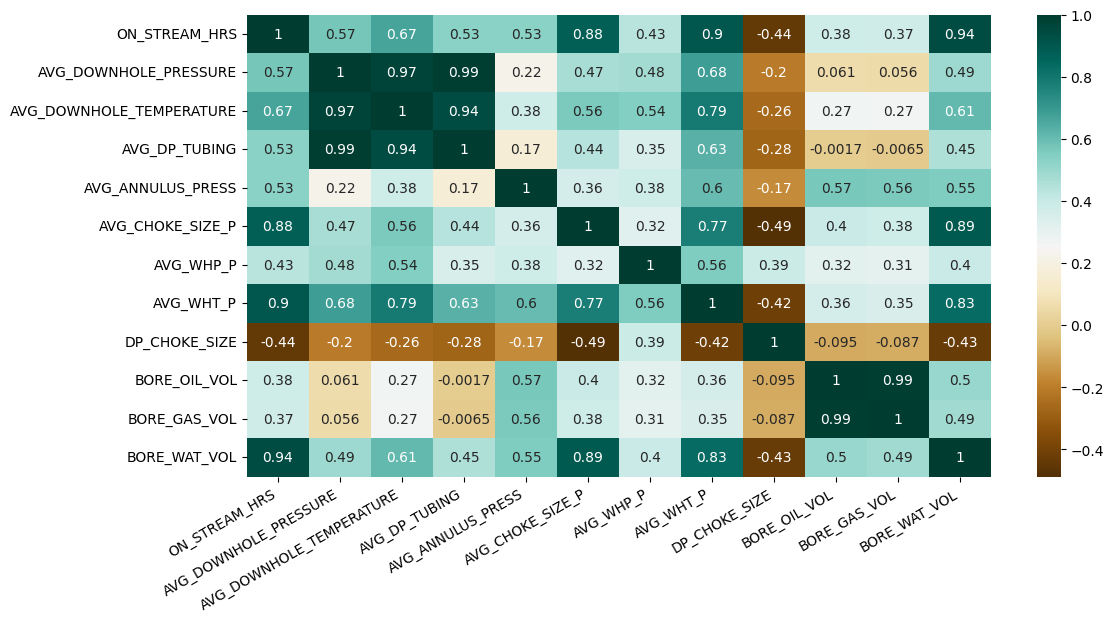

In [15]:
#correlation matrix

plt.figure(figsize=(12,6))
correlation_mat = df4.corr()
ax = sns.heatmap(correlation_mat, annot = True, cmap='BrBG')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);
plt.show()

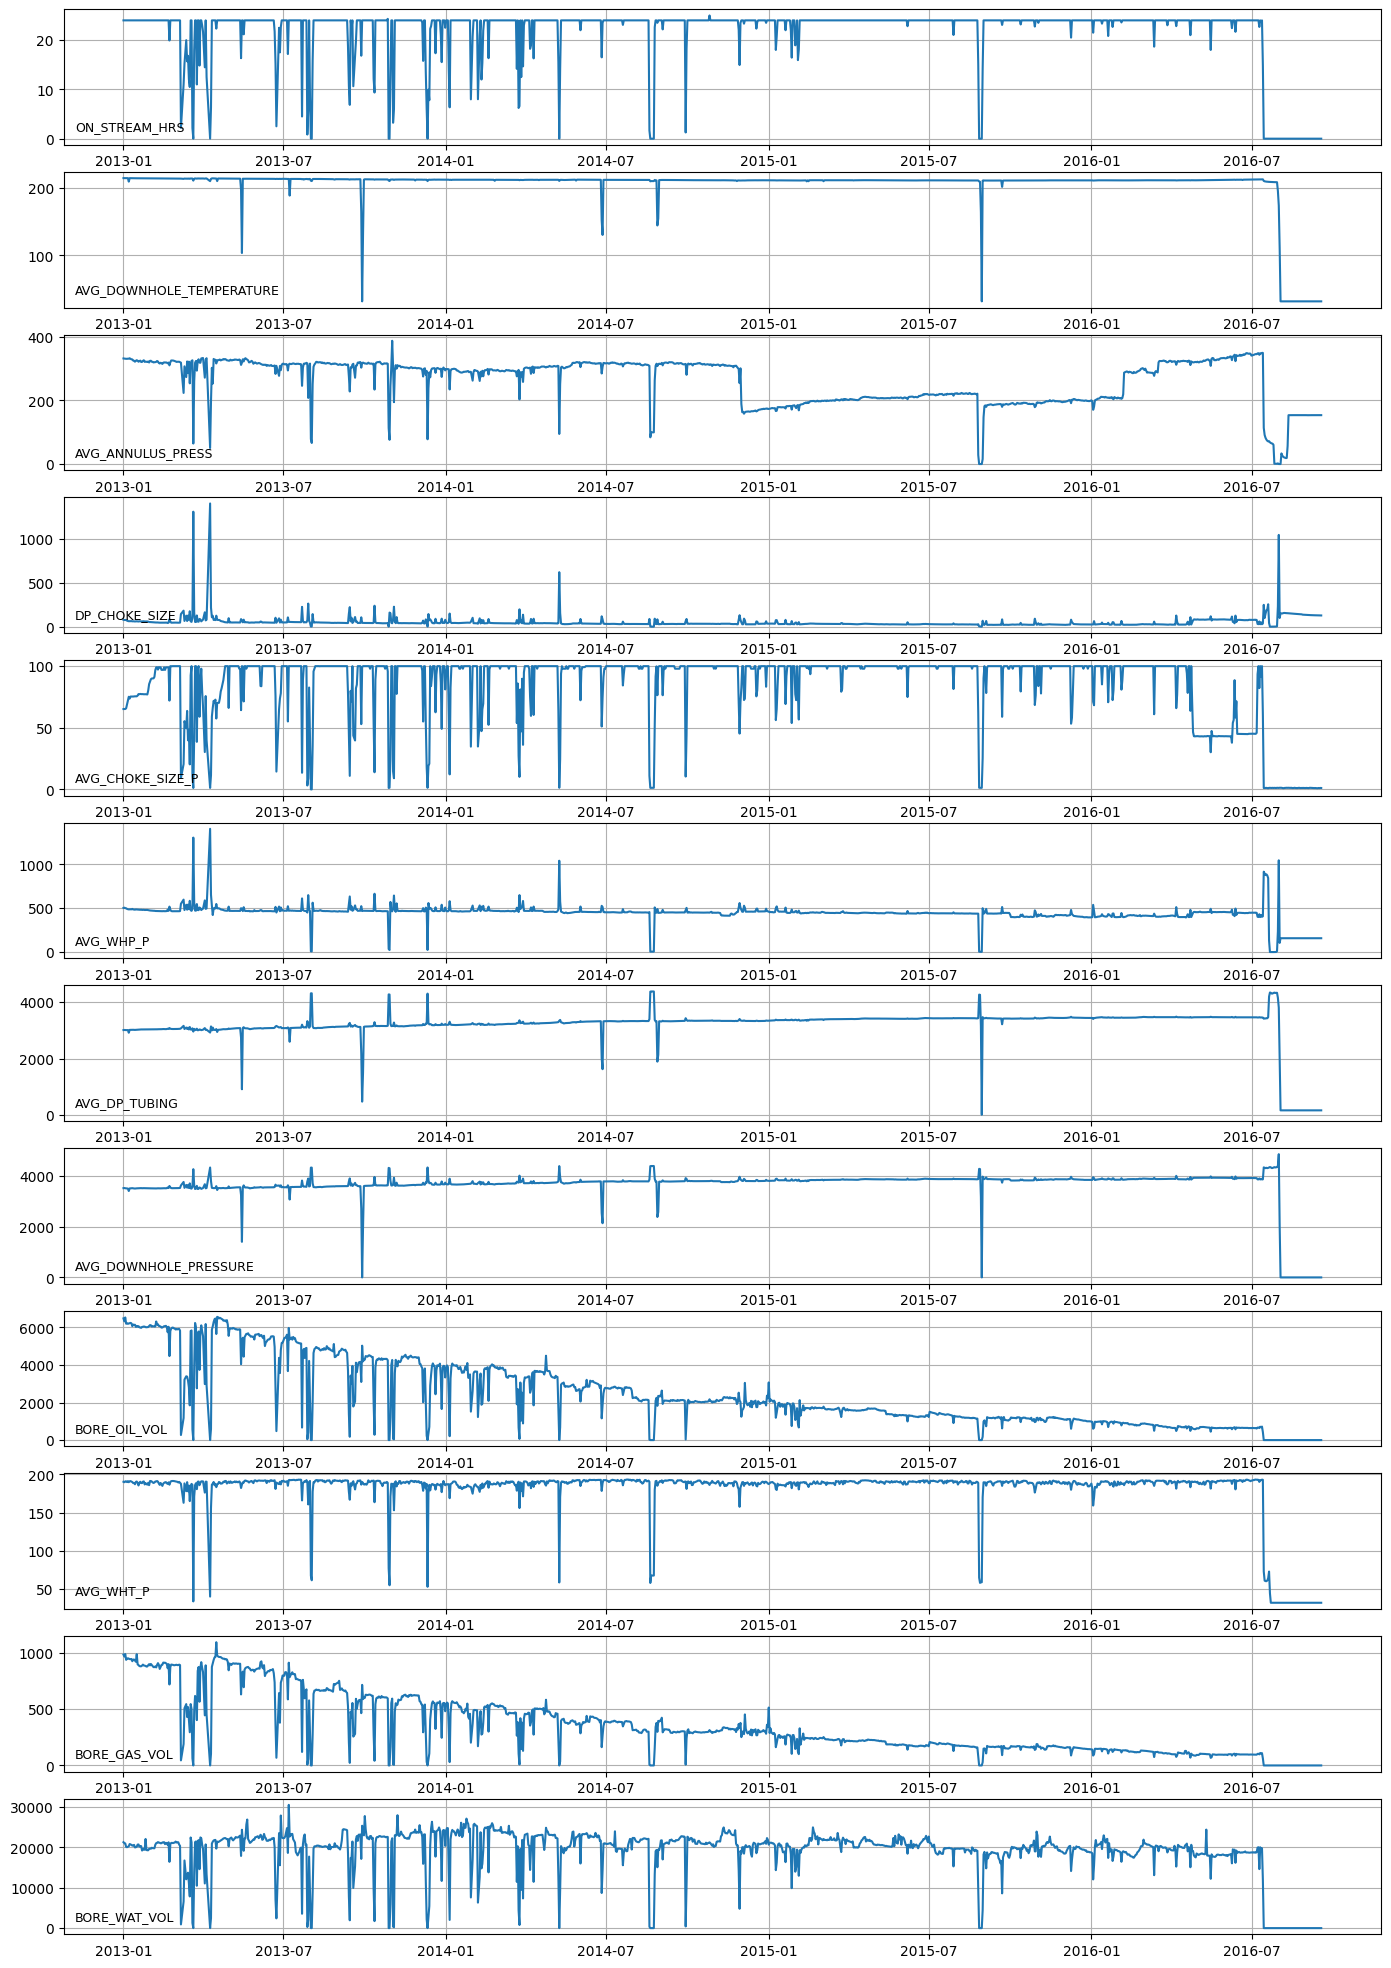

In [16]:
data = ['ON_STREAM_HRS', 
       'AVG_DOWNHOLE_TEMPERATURE',  'AVG_ANNULUS_PRESS',
        'DP_CHOKE_SIZE', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_DP_TUBING','AVG_DOWNHOLE_PRESSURE',   'BORE_OIL_VOL',
       'AVG_WHT_P','BORE_GAS_VOL', 'BORE_WAT_VOL']

# Creating figure with two rows and one column
fig, axs = plt.subplots(nrows=len(data), figsize=(17, 25))

axs = axs.ravel()

for id, column in enumerate(data):

    axs[id].plot(df4[column])
    axs[id].grid(True)
    axs[id].legend([column], loc='lower left', fontsize=9, handlelength=0, handletextpad=0, frameon=False)
    
plt.show()


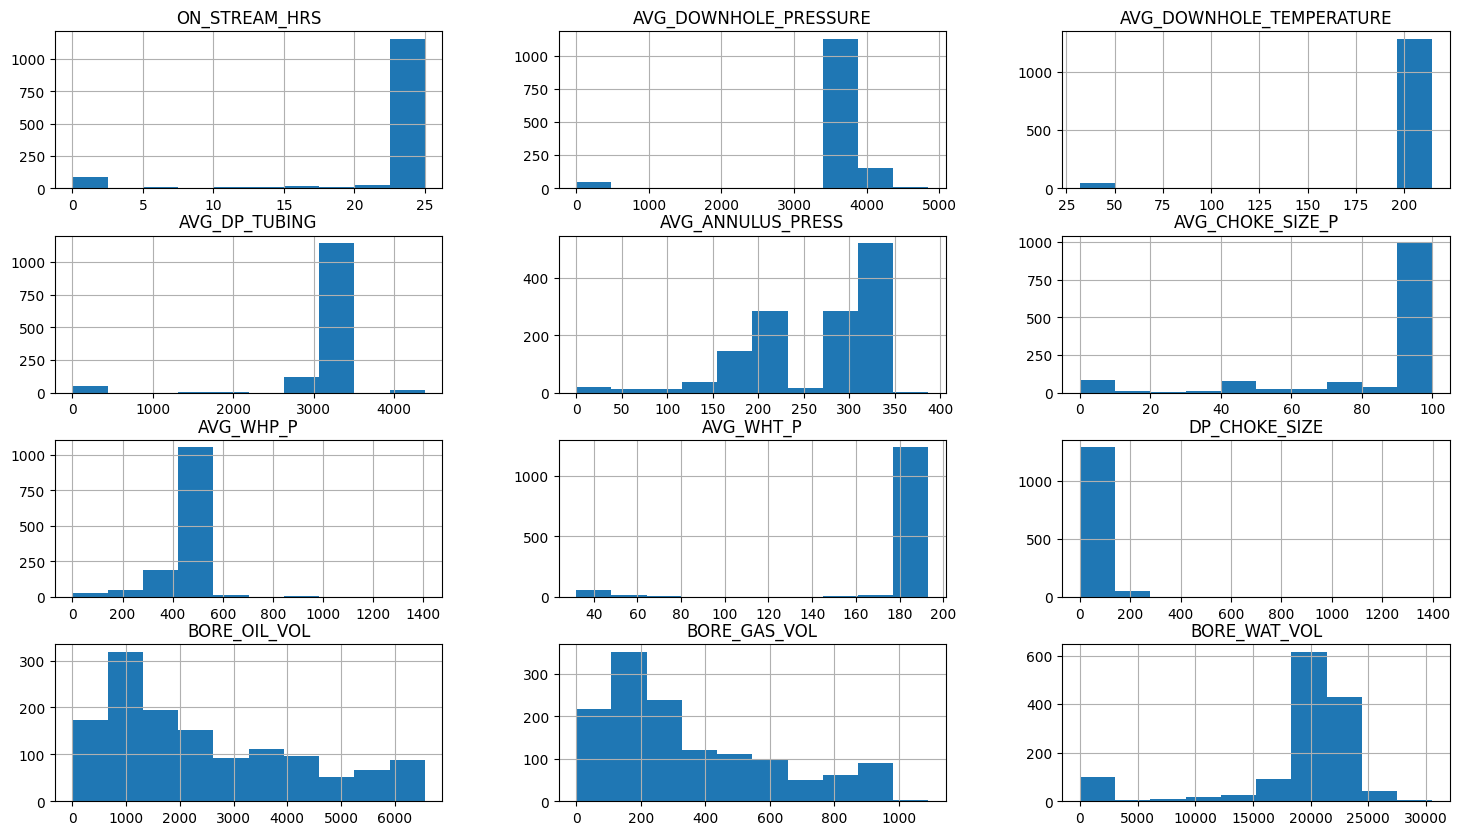

In [18]:
# plotting the distribution of all variables

df4.hist(figsize=(18,10))
plt.show()

In [19]:
df4.loc[df4["ON_STREAM_HRS"] == 0]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
prod_date,,,,,,,,,,,,
2013-03-21,0.0,4262.746142,210.8156,2957.493523,64.353244,1.13564,1305.252619,33.7856,1305.078574,0.0,0.0,0.0
2013-04-09,0.0,4328.245185,209.9948,2922.785992,50.429622,1.18770,1405.459193,40.0838,1398.482877,0.0,0.0,0.0
2013-08-01,0.0,4324.575730,210.6410,4316.163541,78.233356,0.00000,8.412189,67.2980,2.291596,0.0,0.0,0.0
2013-08-02,0.0,4324.488708,210.1478,4317.483385,66.180720,0.00000,6.990819,61.4426,2.668694,0.0,0.0,0.0
2013-10-28,0.0,4313.016222,210.9866,4278.381211,113.376000,1.13680,34.635012,77.1980,1.551904,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-13,0.0,0.000000,32.0000,157.699533,153.493438,0.94937,157.699533,32.0000,128.996564,0.0,0.0,0.0
2016-09-14,0.0,0.000000,32.0000,157.757548,153.493438,1.11452,157.757548,32.0000,128.909542,0.0,0.0,0.0
2016-09-15,0.0,0.000000,32.0000,157.844570,153.478934,1.00047,157.844570,32.0000,128.445421,0.0,0.0,0.0


## Outliers treatment

In [27]:
#  removing unreasonable values (e.g. more than 24 hours on stream) and zero on stream (no production) or zero downhole pressure during production
# examine the cause of the sudden drop in the average downhole pressures
# check the consistency of the wellhead pressure since the summation of downhole pressure and differential pressure across tubing = wellhead pressure
df5 = df4.copy()
df5.drop(df5.loc[ (df5["ON_STREAM_HRS"] == 0) |
                  (df5["ON_STREAM_HRS"] > 24) |
                  (df5["AVG_DOWNHOLE_PRESSURE"] == 0)].index, inplace = True)
# reomving partially operated days since it is due to human intervension

In [ ]:
## df5.loc[df["ON_STREAM_HRS"] < 24]  = 130 rows

In [28]:
df5.shape

(1258, 12)

In [36]:
df5.loc[df5["AVG_DP_TUBING"] < 2500]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
prod_date,,,,,,,,,,,,
2013-05-15,24.00,1401.195083,103.5842,907.617157,318.314324,100.00000,493.577926,186.5750,70.691394,5314.889957,814.633851,24385.595696
2013-09-27,16.83,2711.349978,164.4242,2187.691225,302.548721,52.94305,523.644249,186.5300,106.660753,3094.586815,463.334075,17164.893127
2013-09-29,24.00,1967.088825,130.5680,1495.919230,318.459361,100.00000,471.169596,188.7188,43.409795,4189.013860,587.357546,23800.643310
2014-06-26,16.50,2535.158134,151.8332,2007.931452,284.346485,51.03020,527.226681,178.3400,118.452321,1157.325150,161.998007,8705.097870
2014-06-27,23.50,2134.970007,130.3484,1620.898249,305.333446,74.26816,514.057255,188.6414,83.512730,1868.073748,263.920674,14303.029304
2014-08-28,23.50,2379.692182,144.3938,1889.232568,307.625042,76.42802,490.459615,185.1116,83.817309,1824.045074,297.792877,15095.545440
2014-08-29,24.00,2576.943506,154.7708,2130.024220,313.296018,99.29056,446.919286,188.4632,29.268616,2352.389164,394.836299,19473.253618


array([[<AxesSubplot: title={'center': 'ON_STREAM_HRS'}>,
        <AxesSubplot: title={'center': 'AVG_DOWNHOLE_PRESSURE'}>,
        <AxesSubplot: title={'center': 'AVG_DOWNHOLE_TEMPERATURE'}>],
       [<AxesSubplot: title={'center': 'AVG_DP_TUBING'}>,
        <AxesSubplot: title={'center': 'AVG_ANNULUS_PRESS'}>,
        <AxesSubplot: title={'center': 'AVG_CHOKE_SIZE_P'}>],
       [<AxesSubplot: title={'center': 'AVG_WHP_P'}>,
        <AxesSubplot: title={'center': 'AVG_WHT_P'}>,
        <AxesSubplot: title={'center': 'DP_CHOKE_SIZE'}>],
       [<AxesSubplot: title={'center': 'BORE_OIL_VOL'}>,
        <AxesSubplot: title={'center': 'BORE_GAS_VOL'}>,
        <AxesSubplot: title={'center': 'BORE_WAT_VOL'}>]], dtype=object)

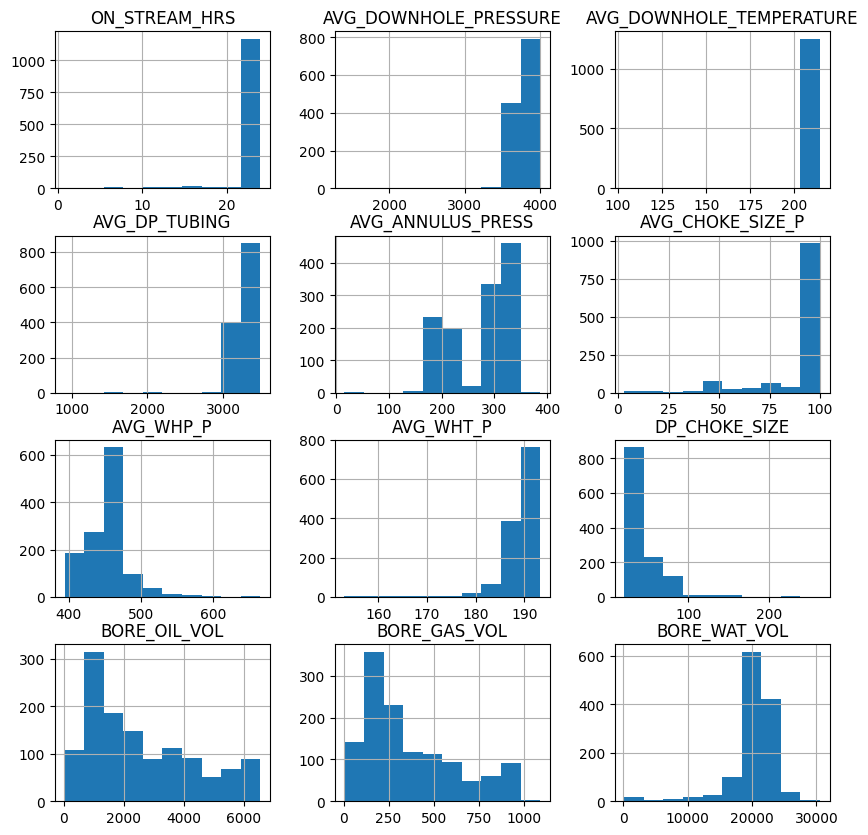

In [30]:
df5.hist(figsize=(10,10))

In [23]:
df5.loc[ df5['AVG_DOWNHOLE_TEMPERATURE'] < 200]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
prod_date,,,,,,,,,,,,
2013-05-15,24.0,1401.195083,103.5842,907.617157,318.314324,100.00000,493.577926,186.5750,70.691394,5314.889957,814.633851,24385.595696
2013-07-08,24.0,3067.345106,188.6450,2595.377803,315.007463,100.00000,471.952799,192.6824,54.896784,5358.918631,782.209530,22706.216266
2013-09-29,24.0,1967.088825,130.5680,1495.919230,318.459361,100.00000,471.169596,188.7188,43.409795,4189.013860,587.357546,23800.643310
2014-08-29,24.0,2576.943506,154.7708,2130.024220,313.296018,99.29056,446.919286,188.4632,29.268616,2352.389164,394.836299,19473.253618


In [24]:

df5.describe()



,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,1128.0,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,24.0,3750.150516,211.676006,3300.517095,272.821270,94.764361,449.633330,189.718441,38.838560,2661.961598,381.487396,21075.047565
std,0.0,160.920750,4.526506,175.295930,56.573318,14.194230,23.445666,2.217996,15.422976,1755.607808,258.411387,1890.566187
min,24.0,1401.195083,103.584200,907.617157,146.865213,42.958420,394.285091,169.642400,21.044976,578.662575,72.282282,14825.083584
25%,24.0,3656.038781,211.196750,3189.220317,207.817323,100.000000,441.052509,188.446550,27.890757,1188.774203,168.797462,19724.846042
50%,24.0,3792.287232,211.521200,3339.929031,303.273910,100.000000,452.532246,190.194800,33.866312,2056.768066,297.048336,20910.475340
75%,24.0,3862.438360,212.265050,3429.663879,317.346197,100.000000,466.720563,191.320250,45.498338,3956.290867,551.591618,22353.986872
max,24.0,3938.731836,214.500200,3478.541597,386.989693,100.000000,555.204461,193.240400,124.181311,6560.272456,987.367375,30555.899895


KeyError: 'prod_date'

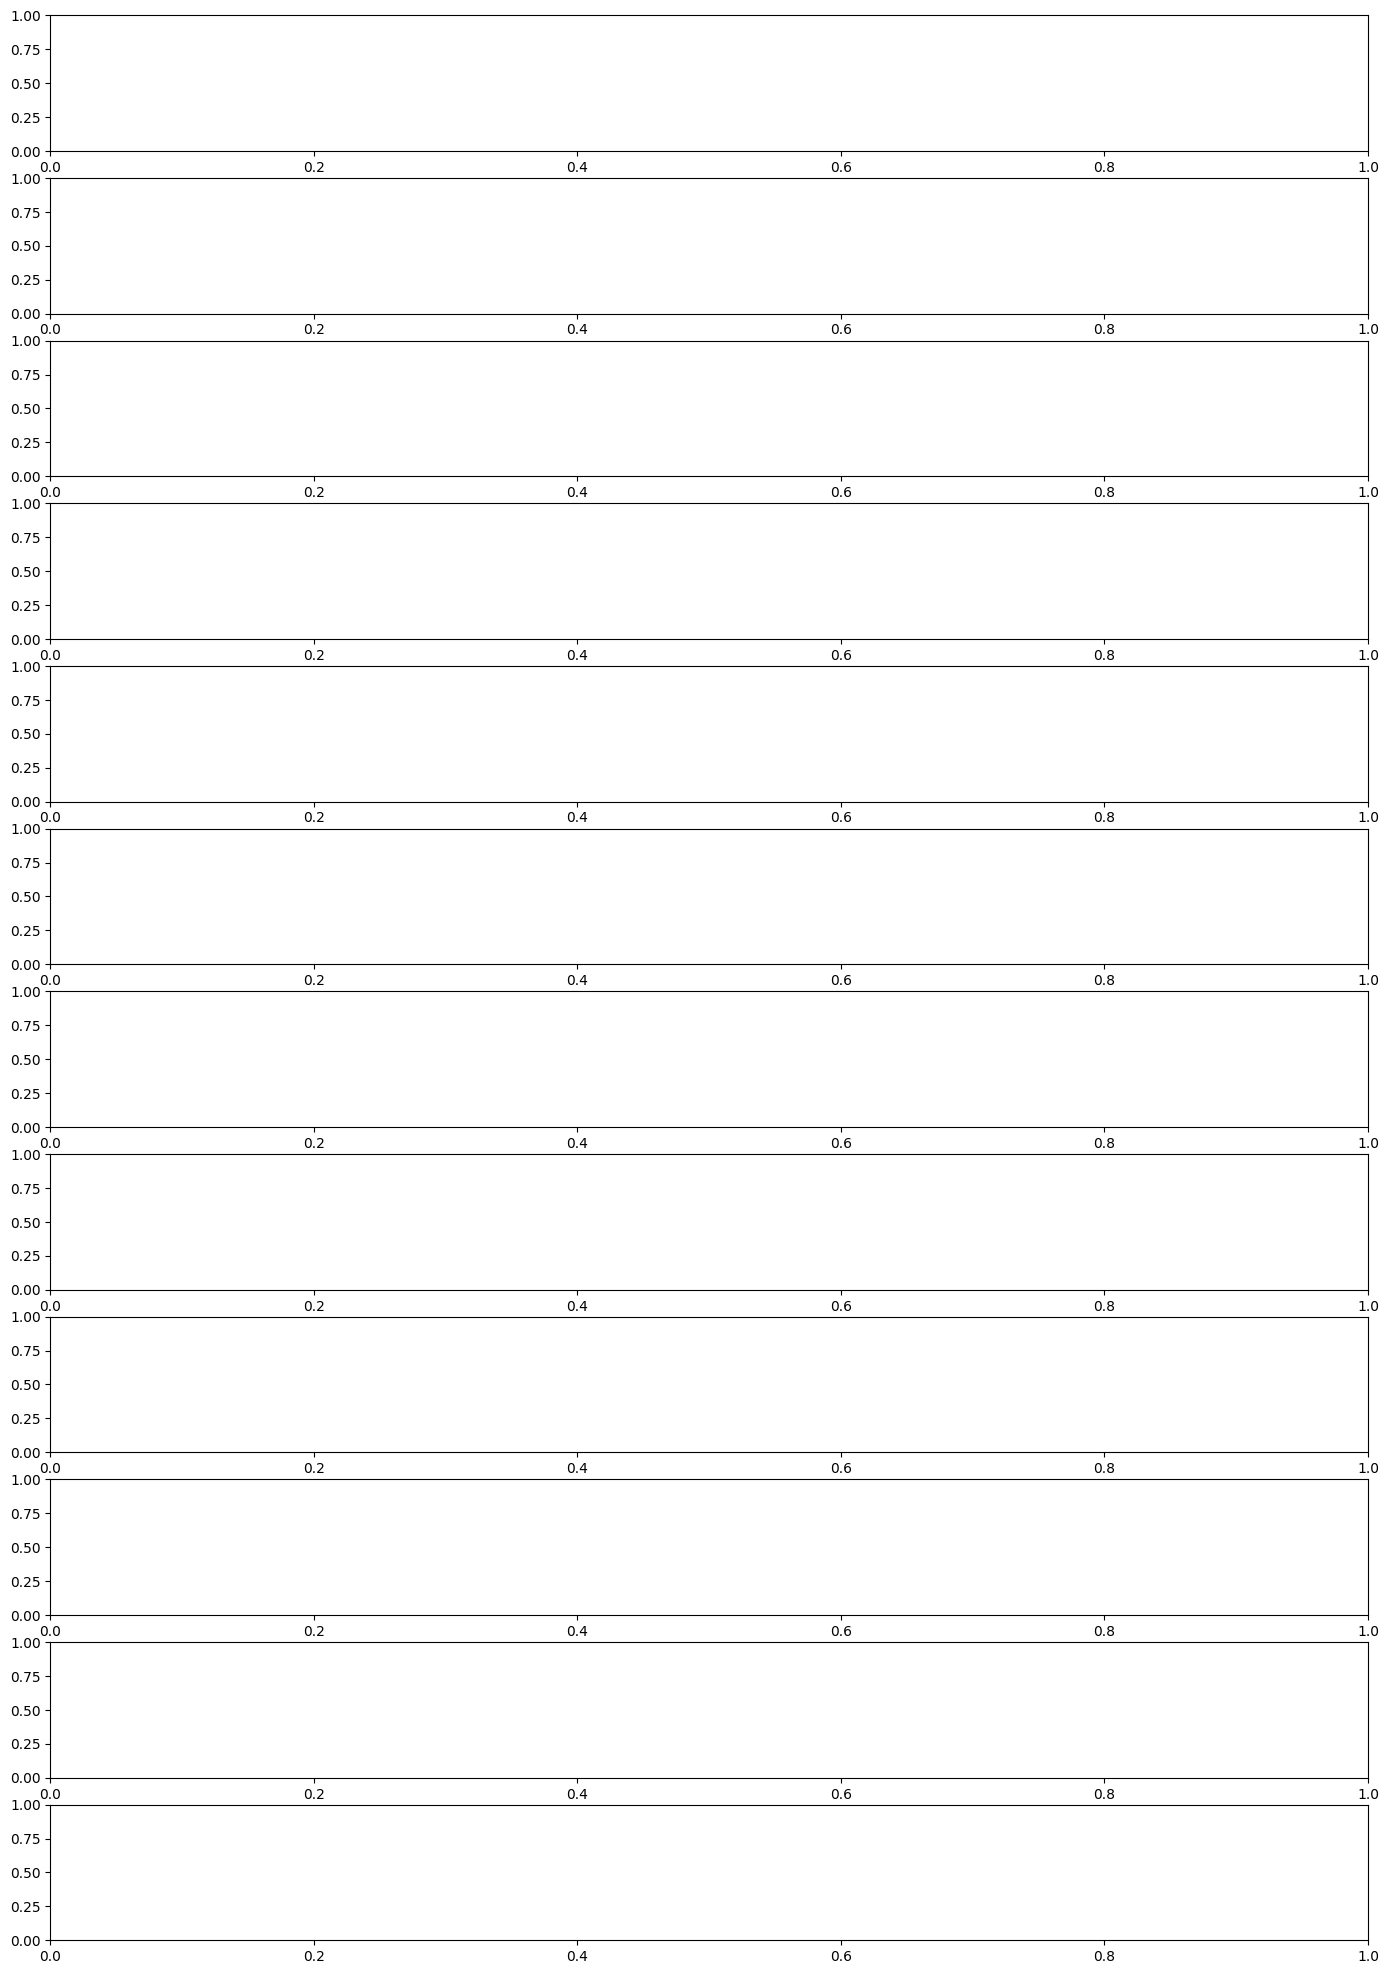

In [25]:
data = ['ON_STREAM_HRS', 
       'AVG_DOWNHOLE_TEMPERATURE',  'AVG_ANNULUS_PRESS',
        'DP_CHOKE_SIZE', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_DP_TUBING','AVG_DOWNHOLE_PRESSURE',   'BORE_OIL_VOL',
       'AVG_WHT_P','BORE_GAS_VOL', 'BORE_WAT_VOL']

# Creating figure with two rows and one column
fig, axs = plt.subplots(nrows=len(data), figsize=(17, 25))

axs = axs.ravel()

for id, column in enumerate(data):

    axs[id].plot(df5["prod_date"], df5[column])
    axs[id].grid(True)
    axs[id].legend([column], loc='lower left', fontsize=9)
    
plt.show()

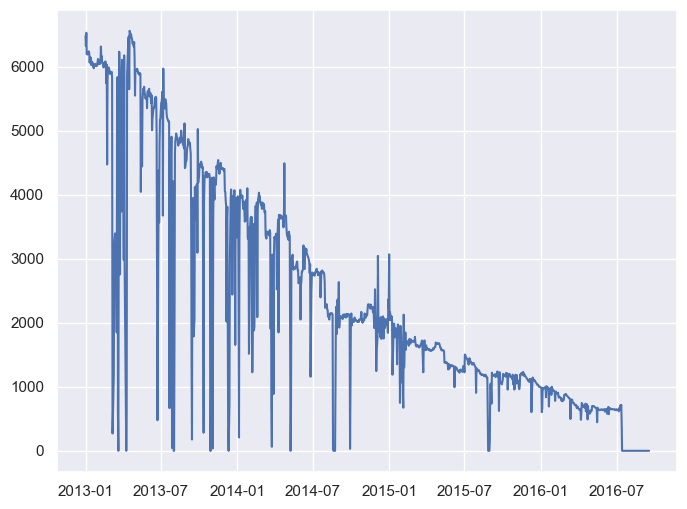

In [ ]:
plt.plot(df4["prod_date"],df4["BORE_OIL_VOL"])

## Outliers detection
* outlier detection (z-score), and smoothing./ anova for feature selection


In [ ]:
pressure_data = df5[["AVG_DOWNHOLE_PRESSURE","AVG_DP_TUBING","AVG_WHP_P"]]
pressure_data["pressure_diff"] = pressure_data ["AVG_DOWNHOLE_PRESSURE"] -  pressure_data ["AVG_DP_TUBING"] 
pressure_data

C:\Users\ash\AppData\Local\Temp\ipykernel_12360\1197777538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pressure_data["pressure_diff"] = pressure_data ["AVG_DOWNHOLE_PRESSURE"] -  pressure_data ["AVG_DP_TUBING"]


,AVG_DOWNHOLE_PRESSURE,AVG_DP_TUBING,AVG_WHP_P,pressure_diff
0,3515.685762,3012.071224,503.614538,503.614538
1,3521.284218,3014.884956,506.399262,506.399262
2,3512.262871,3011.360539,500.916836,500.902332
3,3508.636928,3009.765124,498.871804,498.871804
4,3500.804890,3008.590318,492.200068,492.214571
...,...,...,...,...
1270,3910.202913,3463.414161,446.788752,446.788752
1271,3860.890082,3458.221810,402.653768,402.668272
1272,3858.554974,3458.787457,399.767517,399.767517
1274,3856.887040,3457.670666,399.201870,399.216374


In [ ]:

pressure_data.loc[pressure_data["AVG_WHP_P"] == pressure_data["pressure_diff"]]


,AVG_DOWNHOLE_PRESSURE,AVG_DP_TUBING,AVG_WHP_P,pressure_diff
9,3507.607160,3020.497916,487.109243,487.109243
27,3517.484230,3037.249775,480.234454,480.234454
140,3528.129999,3063.124508,465.005492,465.005492
171,3556.876479,3081.848880,475.027599,475.027599
184,3563.026079,3091.363355,471.662724,471.662724
217,3565.984849,3098.484708,467.500141,467.500141
233,3589.132872,3127.057143,462.075729,462.075729
242,3596.254225,3133.337277,462.916948,462.916948
323,3647.583081,3181.112708,466.470373,466.470373
326,3646.234230,3180.634083,465.600147,465.600147


## Data normalization